# 巡回セールスマン問題(TSP)を遺伝的アルゴリズム(GA)で解く

## 準備
1. 各ライブラリのインポート
1. 各機能の実装

### ライブラリ
- numpy
- random
- matplotilib

In [0]:
import numpy as np
import random
import matplotlib.pyplot as plt

### 各機能の実装

#### 都市の配置生成

In [0]:
def generate_rand_cities(num_cities):
    """
    generate random city layout

    parameter
    ---
    num_cities: int
        number of cities

    return
    ---
    positions: array like
        city layout(x, y)
        size = (num_cities, 2)
    """
    positions = np.zeros((num_cities, 2))
    for i in range(num_cities):
        positions[i, 0] = random.random()
        positions[i, 1] = random.random()
    return positions

In [3]:
generate_rand_cities(10)

array([[0.96547686, 0.89517083],
       [0.87472291, 0.51355631],
       [0.40073603, 0.20631   ],
       [0.16487613, 0.4625026 ],
       [0.67531956, 0.98457667],
       [0.11618613, 0.80600297],
       [0.62248933, 0.202768  ],
       [0.95125645, 0.08340169],
       [0.08898631, 0.37492912],
       [0.1394153 , 0.67242084]])

#### 初期個体の生成

In [0]:
def generate_init_genes(num_indivisual, num_cities):
    """
    generate genes of indivisuals at initial generation

    parameter
    ---
    num_indivisual: int
        number of indivisuals
    
    num_cities:
        number of cities

    return
    ---
    genes: array like
        genes of initial indivisuals
        size = (num_indivisual, num_cities)
    """
    genes = np.zeros((num_indivisual, num_cities), dtype=np.int16)
    for i in range(num_indivisual):
        genes[i,] = random.sample(range(num_cities), k=num_cities)
    return genes

In [5]:
generate_init_genes(15, 10)

array([[8, 2, 4, 5, 3, 9, 7, 6, 0, 1],
       [5, 4, 1, 2, 9, 8, 0, 3, 7, 6],
       [9, 4, 7, 5, 2, 8, 0, 1, 3, 6],
       [9, 7, 3, 8, 0, 4, 5, 2, 1, 6],
       [1, 7, 9, 0, 2, 4, 8, 3, 5, 6],
       [1, 3, 7, 2, 8, 4, 0, 9, 5, 6],
       [4, 7, 0, 8, 3, 5, 2, 6, 9, 1],
       [1, 4, 9, 6, 5, 0, 7, 2, 8, 3],
       [1, 3, 5, 4, 8, 7, 2, 9, 6, 0],
       [0, 1, 4, 7, 8, 5, 6, 3, 9, 2],
       [4, 1, 8, 6, 3, 2, 7, 5, 9, 0],
       [6, 1, 2, 0, 3, 8, 4, 7, 5, 9],
       [6, 0, 5, 3, 1, 7, 4, 8, 9, 2],
       [6, 3, 7, 9, 2, 1, 8, 4, 0, 5],
       [7, 0, 2, 4, 6, 3, 9, 1, 5, 8]], dtype=int16)

#### 一個体の経路の長さを求める

In [0]:
def sum_path(cities, gene):
    """
    caluculate summantion of path

    parameter
    ---
    cities: array like
        positions(x, y) of cities
        size = (number of cities, 2)
    
    gene: array like
        a gene of an indivisual
        size = (num_cities)

    return
    ---
    sum: float
        the length of the travelling path
    """
    sum = 0.
    for i in range(len(cities)-1):
        sum += np.linalg.norm(cities[int(gene[i])]-cities[int(gene[i+1])])
    return sum

In [7]:
cities = generate_rand_cities(10)
genes = generate_init_genes(15, 10)
for i in range(15):
    print(sum_path(cities, genes[i]))

5.784752598128152
5.069179663905663
5.196185214875103
5.404761097201119
6.009020387402062
4.878501112120918
5.959469180390823
5.005984750971875
5.635967414568209
5.176689745039078
4.8203871788167225
5.5344437678117036
5.303643086876667
3.8381584582808976
6.373581040415164


#### 一世代分の個体のそれぞれの経路長を求める

In [0]:
def genes_path(genes, cities):
    """
    calculate path lengthes of all indivisuals

    parameters
    ---
    genes: array like
        a gene of an indivisual
        size = (num_cities)
    
    cities: array like
        positions(x, y) of cities
        size = (number of cities, 2)
    
    return
    ---
    pathlength_vec: array like
        path lengthes of each indivisuals
        size = (num_indivisual)
    """
    pathlength_vec = np.zeros(len(genes))
    for i in range(len(genes)):
        indices = genes[i]
        pathlength_vec[i] = sum_path(cities, indices)
    return pathlength_vec

In [9]:
cities = generate_rand_cities(10)
genes = generate_init_genes(15, 10)

1/genes_path(genes, cities)

array([0.22752602, 0.20500723, 0.22210175, 0.2994313 , 0.20047577,
       0.24840044, 0.24091371, 0.18272677, 0.16980675, 0.15661008,
       0.19315509, 0.19732937, 0.1739917 , 0.17195937, 0.25348476])

#### ルーレット選択のための選択確率テーブル生成

In [0]:
def generate_roulette(fitness_vec):
    """
    obtain probabilities for roulette choice

    parameter
    ---
    fitness_vec: array like
        fitnesses of target indivisuals
        size = (indivisual)

    return
    ---
    roulette: array like
        table of probabilities for choice
    """
    total = np.sum(fitness_vec)
    roulette = np.zeros(len(fitness_vec))
    for i in range(len(fitness_vec)):
        roulette[i] = fitness_vec[i]/total
    return roulette

In [11]:
fitness = np.array([20,50,30])
generate_roulette(fitness)

array([0.2, 0.5, 0.3])

In [12]:
cities = generate_rand_cities(5)
genes = generate_init_genes(3, 5)

path = genes_path(genes, cities)
inverse_path = 1/path
print("path length: "+str(path))
print("roulette table: "+str(generate_roulette(inverse_path)))

path length: [2.72495973 2.71267061 2.26613168]
roulette table: [0.31181768 0.3132303  0.37495201]


#### ルーレット選択

In [0]:
def roulette_choice(fitness_vec):
    """
    choice genes for crossover by using generate_roulette

    parameter
    ---
    fitness_vec: array like
        fitnesses of target indivisuals
        size = (indivisual)

    return
    ---
    choiced: array like
        indicies of choiced indivisuals
        size = (1, 2)
    """
    roulette = generate_roulette(fitness_vec)
    choiced = np.random.choice(len(roulette), 2, replace=True, p=roulette)
    return choiced

In [14]:
cities = generate_rand_cities(10)
genes = generate_init_genes(6, 10)
fitness_vec = 1 / genes_path(genes, cities)
for i in range(3):
    print(roulette_choice(fitness_vec))

[1 3]
[1 1]
[3 1]


#### 部分的交叉

In [0]:
def partial_crossover(parent1, parent2):
    """
    crossover two genes by partial crossover

    parameter
    ---
    parent1, parent2: array like
        genes of parents
        size = (num_cities)

    return
    ---
    child1, child2: array like
        crossovered genes
        size = (num_cities)
    """
    num = len(parent1)
    cross_point = random.randrange(0, num-1)
    child1 = parent1
    child2 = parent2
    for i in range(num - cross_point):
        target_index = cross_point + i
        
        target_value1 = parent1[target_index]
        target_value2 = parent2[target_index]
        exchange_index1 = np.where(parent1 == target_value2)
        exchange_index2 = np.where(parent2 == target_value1)

        child1[target_index] = target_value2
        child2[target_index] = target_value1
        child1[exchange_index1] = target_value1
        child2[exchange_index2] = target_value2
    return child1, child2

In [16]:
genes = generate_init_genes(10, 10)
print("parent1: "+str(genes[0]))
print("parent2: "+str(genes[1]))
child = partial_crossover(genes[0], genes[1])
print("child1:  "+str(child[0]))
print("child2:  "+str(child[1]))

parent1: [6 5 9 1 8 7 2 3 4 0]
parent2: [3 7 8 9 2 6 1 5 4 0]
child1:  [5 6 1 9 2 3 8 7 4 0]
child2:  [7 3 2 1 8 5 9 6 4 0]


#### 突然変異（転座）

In [0]:
def translocation_mutation(genes, num_mutation, p_value):
    """
    translocation mutation algorithm

    parameters
    ---
    genes: array like
        genes of initial indivisuals
        size = (num_indivisual, num_cities)
    
    num_mutation: int
        number of mutation target
    
    p_value: float
        probability of mutation

    returns
    ---
    mutated_genes: array like
        mutated genes with translocation
        size = (num_indivisual, num_cities)
    """
    mutated_genes = genes
    for i in range(num_mutation):
        mutation_flg = np.random.choice(2, 1, p = [1-p_value, p_value])
        if mutation_flg == 1:
            mutation_value = np.random.choice(genes[i], 2, replace=  False)
            mutation_position1 = np.where(genes[i] == mutation_value[0])
            mutation_position2 = np.where(genes[i] == mutation_value[1])
            mutated_genes[i][mutation_position1] = mutation_value[1]
            mutated_genes[i][mutation_position2] = mutation_value[0]
    return mutated_genes

In [18]:
genes = generate_init_genes(5, 10)
print("before")
print(genes)
print("after")
print(translocation_mutation(genes, 3, 0.7))

before
[[8 3 1 5 0 2 9 7 6 4]
 [1 4 5 7 8 3 2 6 9 0]
 [4 9 0 3 5 1 2 8 6 7]
 [6 3 8 9 0 4 5 2 1 7]
 [8 2 0 1 3 5 4 6 7 9]]
after
[[2 3 1 5 0 8 9 7 6 4]
 [1 4 5 7 8 2 3 6 9 0]
 [9 4 0 3 5 1 2 8 6 7]
 [6 3 8 9 0 4 5 2 1 7]
 [8 2 0 1 3 5 4 6 7 9]]


#### 都市の配置とルートの可視化

In [0]:
def show_cities(cities):
    """
    show layout of cities

    parameter
    ---
    cities: array like
        positions(x, y) of cities
        size = (number of cities, 2)
    """
    for i in range(len(cities)):
        plt.scatter(cities[i][0], cities[i][1])

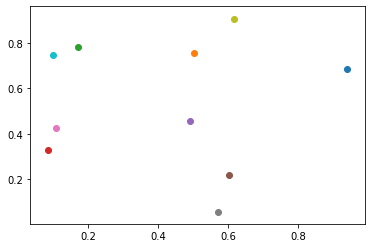

In [20]:
cities = generate_rand_cities(10)
show_cities(cities)

In [0]:
def show_route(cities, genes):
    """
    show route of traveling cities

    parameter
    ---
    cities: array like
        positions(x, y) of cities
        size = (number of cities, 2)

    genes: array like
        a gene of an indivisual
        size = (num_cities)
    """
    for i in range(len(genes)-1):
        if i == 0:
            plt.text(cities[int(genes[i])][0], cities[int(genes[i])][1], "start")
        else:
            plt.text(cities[int(genes[i])][0], cities[int(genes[i])][1], str(i))
        plt.plot([cities[int(genes[i])][0], cities[int(genes[i+1])][0]], 
                 [cities[int(genes[i])][1], cities[int(genes[i+1])][1]])
    plt.text(cities[int(genes[i+1])][0], cities[int(genes[i+1])][1], "goal")

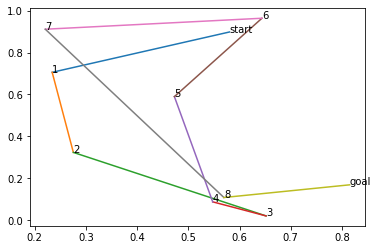

In [22]:
cities = generate_rand_cities(10)
genes = generate_init_genes(10, 10)
show_route(cities, genes[0])

## 実行部

### パラメータ設定

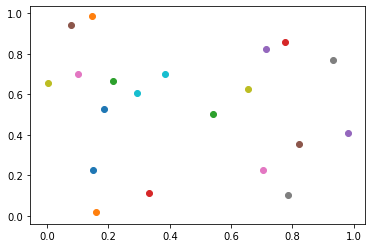

In [23]:
num_cities = 20
indivisuals = 21
generation = 10000
elite = 9
p_mutation = 0.005

### 初期化

In [0]:
cities = generate_rand_cities(num_cities)
genes = generate_init_genes(indivisuals, num_cities)
show_cities(cities)

### GAの実行

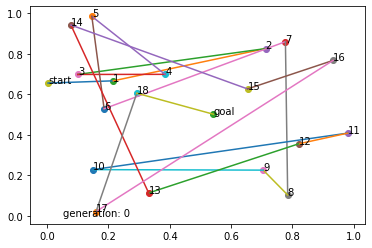

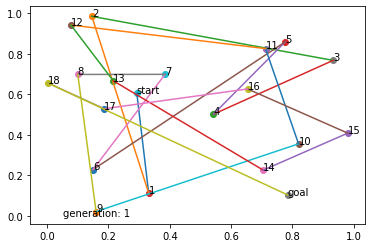

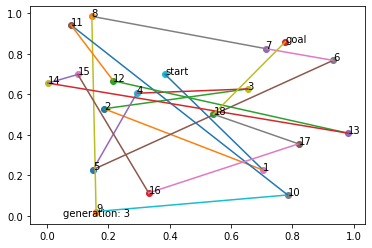

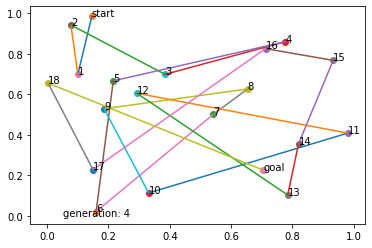

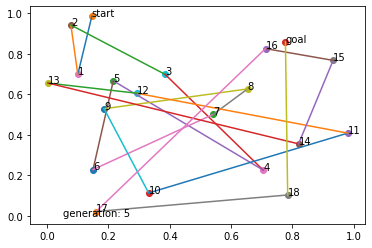

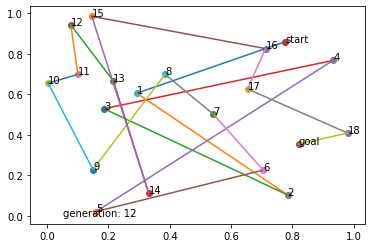

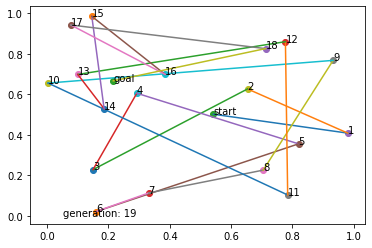

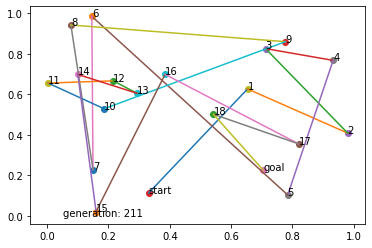

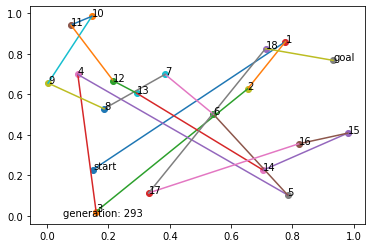

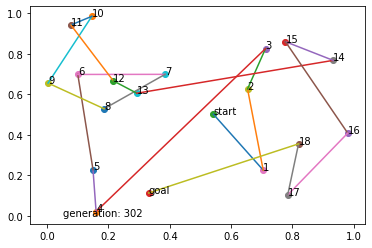

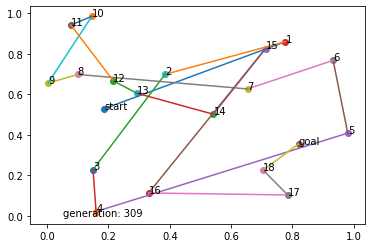

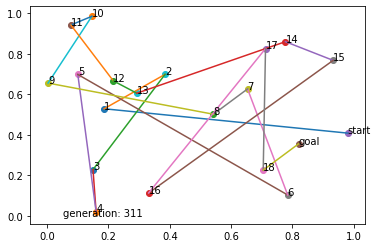

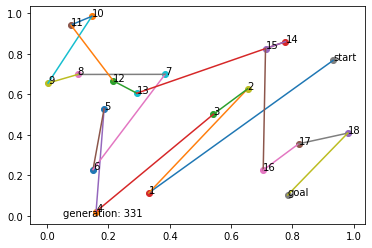

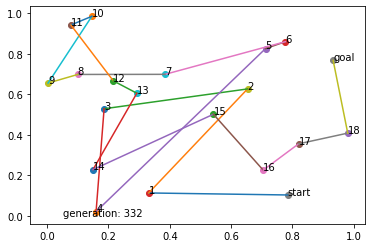

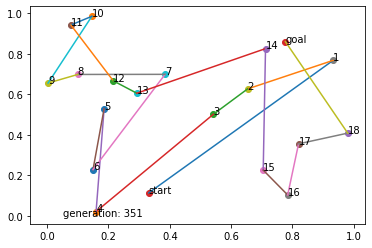

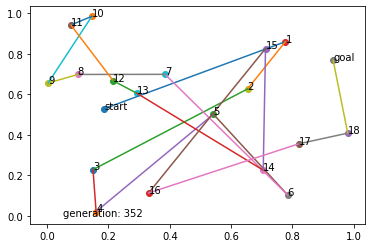

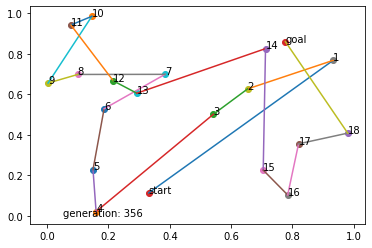

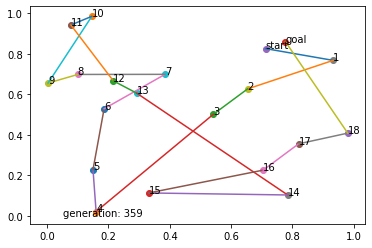

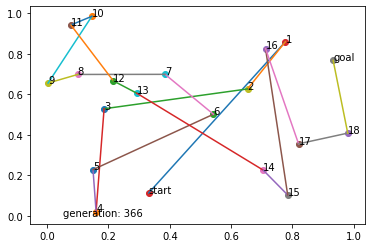

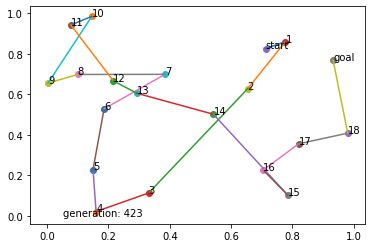

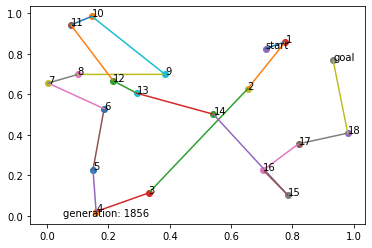

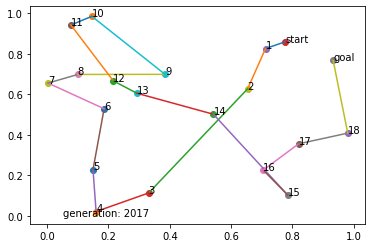

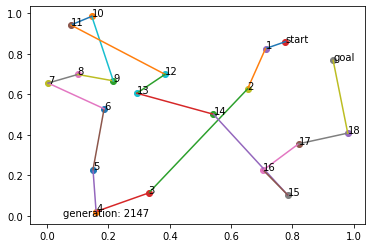

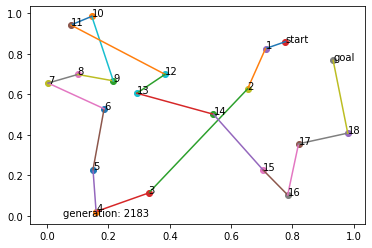

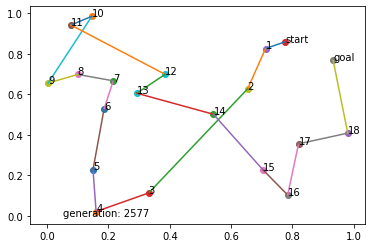

In [24]:
top_indivisual=[]
max_fit = 0
for i in range(generation):
    fitness_vec = np.reciprocal(genes_path(genes, cities))
    child = np.zeros(np.shape(genes))
    for j in range(int((indivisuals-elite)/2)):
        parents_indices = roulette_choice(fitness_vec)
        child[2*j], child[2*j+1] = partial_crossover(genes[parents_indices[0]], 
                                                     genes[parents_indices[1]])
    
    for j in range(indivisuals-elite, indivisuals):
        child[j] = genes[np.argsort(fitness_vec)[j]]

    child = translocation_mutation(child, indivisuals-elite, p_mutation)
    top_indivisual.append(max(fitness_vec))
    genes = child
    if max(fitness_vec) > max_fit:
        max_fit = max(fitness_vec)
        show_cities(cities)
        show_route(cities, child[np.argmax(fitness_vec)])
        plt.text(0.05, 0.0, "generation: "+str(i))
        plt.show()

### 適応度の遷移

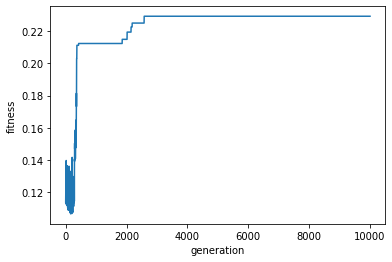

In [25]:
plt.plot(top_indivisual)
plt.xlabel("generation")
plt.ylabel("fitness")
plt.show();